In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [42]:
df = pd.read_csv ("/Users/mohadeseh/Documents/me/session8/data_mining/FDM_Project_dataset-99-2/divar_dataset/divar_posts_dataset.csv") 
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN


In [4]:
orders = pd.read_csv("/Users/mohadeseh/Documents/me/session8/data_mining/FDM_Project_dataset-99-2/digikala_dataset/orders.csv")
orders

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


# 1.clustring cities based on posting

In [43]:
df = df[(df['cat2'].notnull())]
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN


In [44]:
df = df[(df['cat3'].notnull())]
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN


In [45]:
df = df[(df['brand'].notnull())]
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
8,8,False,سایر,vehicles,cars,light,Tehran,Wednesday 04AM,دوگانه ال پی جی بیمه با تخفیف دارد \nتودوزی نو...,59878876364899,3,180000.0,mobile,-1,پاترول شش سیلندر چهار درب,NaN,1366
11,11,False,Nokia::نوکیا,electronic-devices,mobile-tablet,mobile-phones,Qom,Wednesday 07AM,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,36762902012926,2,NaN,mobile,60000,نوکیا6303,NaN,NaN
18,18,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Karaj,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,51728781836074,0,290000.0,web,8500000,پژو مدل 81 مشکی,NaN,1381
19,19,False,Apple::اپل,electronic-devices,mobile-tablet,mobile-phones,Tehran,Wednesday 11AM,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,54942524705708,0,NaN,mobile,1150000,ایفون ٥اس٣٢گیگ,NaN,NaN
22,22,False,نیسان::Nissan,vehicles,cars,light,Tehran,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,26591305369165,3,175000.0,mobile,19500000,پاترول 2در,NaN,1372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947615,947615,True,سمند::Samand,vehicles,cars,light,Shiraz,Wednesday 06PM,ماشینم تصادفیه با خریدار توافق میکنم سر قیمتش,32248935135739,3,20000.0,web,-1,خودرو سمند تصادفی مدل92,NaN,1392
947621,947621,True,Samsung::سامسونگ,electronic-devices,mobile-tablet,mobile-phones,Tehran,Thursday 09AM,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,20251684311504,2,NaN,mobile,475000,گلکسی galaxy s4 i9500,NaN,NaN
947622,947622,True,Sony::سونی,electronic-devices,mobile-tablet,mobile-phones,Mashhad,Thursday 11AM,فروش یا معاوضه فوری فوری\nسفید تمیز همراه با گ...,48122459746674,0,NaN,web,650000,سونی Z2فورجی سفیدD6503,NaN,NaN
947625,947625,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Karaj,Thursday 03PM,سند۲ برگ،بیمه تا برج$NUMتخفیفات بیمه 15 سال،مع...,30197850752025,4,123000.0,mobile,6900000,پراید 79 بسیار سالم,NaN,1379


In [46]:
sub_df = df[['cat1','cat2','cat3','brand']]
df_new = pd.get_dummies(sub_df)
df_new

,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,brand_Acer::ایسر,...,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
8,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947615,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947621,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
947622,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
947625,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
city = df[['city']]
df_new1 = pd.concat([city,df_new], axis=1)
df_new1


,city,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,...,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
8,Tehran,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Qom,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18,Karaj,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
19,Tehran,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,Tehran,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947615,Shiraz,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
947621,Tehran,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
947622,Mashhad,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
947625,Karaj,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
df_new1 = df_new1.groupby(by=['city'],as_index=False).sum()
df_new1

,city,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,...,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
0,Ahvaz,4296.0,4879.0,4879.0,0.0,4296.0,0.0,4879.0,4296.0,0.0,...,0.0,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0
1,Isfahan,5408.0,8773.0,8773.0,0.0,5408.0,0.0,8773.0,5021.0,387.0,...,344.0,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0
2,Karaj,6269.0,11057.0,11057.0,405.0,5864.0,405.0,11057.0,5443.0,421.0,...,508.0,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0
3,Kermanshah,2582.0,2277.0,2277.0,0.0,2582.0,0.0,2277.0,2582.0,0.0,...,0.0,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0
4,Mashhad,10862.0,15088.0,15088.0,681.0,10181.0,681.0,15088.0,9560.0,621.0,...,586.0,3523.0,1004.0,596.0,1277.0,592.0,1064.0,1221.0,528.0,0.0
5,Qom,2925.0,1683.0,1683.0,0.0,2925.0,0.0,1683.0,2925.0,0.0,...,0.0,1133.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0
6,Shiraz,6600.0,18344.0,18344.0,370.0,6230.0,370.0,18344.0,5771.0,459.0,...,985.0,3874.0,1080.0,456.0,1550.0,518.0,1149.0,1802.0,1174.0,0.0
7,Tabriz,3491.0,4421.0,4421.0,0.0,3491.0,0.0,4421.0,3491.0,0.0,...,0.0,1289.0,0.0,687.0,332.0,0.0,0.0,613.0,572.0,0.0
8,Tehran,28008.0,53929.0,53929.0,2468.0,25540.0,2468.0,53929.0,23087.0,2453.0,...,1946.0,10500.0,2288.0,1159.0,2770.0,1622.0,5417.0,4466.0,1376.0,1237.0


In [49]:
groupsOFCity = df_new1['city']
groupsOFCity

0         Ahvaz
1       Isfahan
2         Karaj
3    Kermanshah
4       Mashhad
5           Qom
6        Shiraz
7        Tabriz
8        Tehran
Name: city, dtype: object

# agglomerative

In [50]:
AggloX = df_new1.iloc[:,1:]
clustering_agglomerative = AgglomerativeClustering().fit(AggloX)
AggloX['agglo'] = clustering_agglomerative.labels_


In [51]:
AggloX.iloc[:, 62]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
Name: agglo, dtype: int64

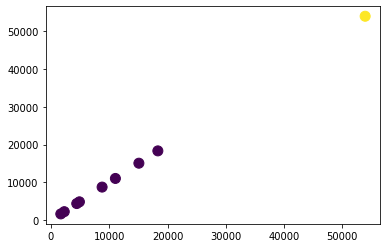

In [52]:
AggloXX = np.array(AggloX)
plt.scatter(AggloXX[:, 1], AggloXX[:, 2], c=AggloXX[:, 62], s=100, cmap='viridis')
plt.rcParams["figure.figsize"] = (20,3)
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

In [53]:
AggloX
AggloCityLabels = pd.concat([groupsOFCity,AggloX],axis=1)
AggloCityLabels

,city,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,...,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,agglo
0,Ahvaz,4296.0,4879.0,4879.0,0.0,4296.0,0.0,4879.0,4296.0,0.0,...,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0,0
1,Isfahan,5408.0,8773.0,8773.0,0.0,5408.0,0.0,8773.0,5021.0,387.0,...,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0,0
2,Karaj,6269.0,11057.0,11057.0,405.0,5864.0,405.0,11057.0,5443.0,421.0,...,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0,0
3,Kermanshah,2582.0,2277.0,2277.0,0.0,2582.0,0.0,2277.0,2582.0,0.0,...,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0,0
4,Mashhad,10862.0,15088.0,15088.0,681.0,10181.0,681.0,15088.0,9560.0,621.0,...,3523.0,1004.0,596.0,1277.0,592.0,1064.0,1221.0,528.0,0.0,0
5,Qom,2925.0,1683.0,1683.0,0.0,2925.0,0.0,1683.0,2925.0,0.0,...,1133.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,0
6,Shiraz,6600.0,18344.0,18344.0,370.0,6230.0,370.0,18344.0,5771.0,459.0,...,3874.0,1080.0,456.0,1550.0,518.0,1149.0,1802.0,1174.0,0.0,0
7,Tabriz,3491.0,4421.0,4421.0,0.0,3491.0,0.0,4421.0,3491.0,0.0,...,1289.0,0.0,687.0,332.0,0.0,0.0,613.0,572.0,0.0,0
8,Tehran,28008.0,53929.0,53929.0,2468.0,25540.0,2468.0,53929.0,23087.0,2453.0,...,10500.0,2288.0,1159.0,2770.0,1622.0,5417.0,4466.0,1376.0,1237.0,1


# kmeans

In [54]:
X_kmeans1 = df_new1.iloc[:,1:]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_kmeans1)
    distortions.append(kmeanModel.inertia_)

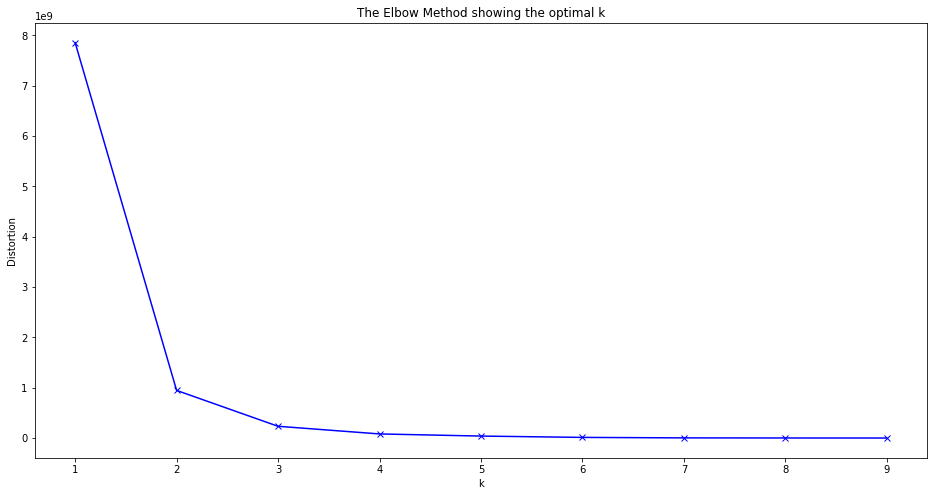

In [55]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_kmeans1)

KMeans(n_clusters=3)

In [57]:
y_kmeans1 = kmeanModel.predict(X_kmeans1)
X_kmeans1['k_means'] = y_kmeans1
centers = kmeanModel.cluster_centers_

X_kmeans1

,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,brand_Acer::ایسر,...,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,k_means
0,4296.0,4879.0,4879.0,0.0,4296.0,0.0,4879.0,4296.0,0.0,4.0,...,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0,0
1,5408.0,8773.0,8773.0,0.0,5408.0,0.0,8773.0,5021.0,387.0,6.0,...,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0,0
2,6269.0,11057.0,11057.0,405.0,5864.0,405.0,11057.0,5443.0,421.0,39.0,...,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0,2
3,2582.0,2277.0,2277.0,0.0,2582.0,0.0,2277.0,2582.0,0.0,5.0,...,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0,0
4,10862.0,15088.0,15088.0,681.0,10181.0,681.0,15088.0,9560.0,621.0,88.0,...,3523.0,1004.0,596.0,1277.0,592.0,1064.0,1221.0,528.0,0.0,2
5,2925.0,1683.0,1683.0,0.0,2925.0,0.0,1683.0,2925.0,0.0,6.0,...,1133.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,0
6,6600.0,18344.0,18344.0,370.0,6230.0,370.0,18344.0,5771.0,459.0,32.0,...,3874.0,1080.0,456.0,1550.0,518.0,1149.0,1802.0,1174.0,0.0,2
7,3491.0,4421.0,4421.0,0.0,3491.0,0.0,4421.0,3491.0,0.0,0.0,...,1289.0,0.0,687.0,332.0,0.0,0.0,613.0,572.0,0.0,0
8,28008.0,53929.0,53929.0,2468.0,25540.0,2468.0,53929.0,23087.0,2453.0,224.0,...,10500.0,2288.0,1159.0,2770.0,1622.0,5417.0,4466.0,1376.0,1237.0,1


In [79]:
X_kmeans11= np.array(X_kmeans1)

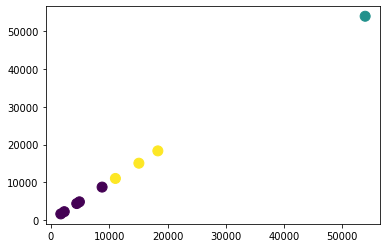

In [41]:
plt.scatter(X_kmeans11[:, 1], X_kmeans11[:, 2], c=y_kmeans1, s=100, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)


# DBSCAN

In [80]:
from sklearn.cluster import DBSCAN
X = df_new1.iloc[:,1:]
clustering = DBSCAN(eps=0.4, min_samples=2).fit(X)
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1])

# q2. Clustring the cities based on selling products


In [5]:
orders

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [6]:
orders['ID_Item'].isnull().sum()

0

In [7]:
otherCity = orders[ (orders['city_name_fa'] =='اهواز') | ( orders['city_name_fa'] == 'تبریز')|
                         (orders['city_name_fa'] == 'اصفهان') | (orders['city_name_fa'] == 'کرج') |
                         (orders['city_name_fa'] == 'کرمانشاه') | (orders['city_name_fa'] == 'مشهد') |
                         (orders['city_name_fa'] == 'قم') | (orders['city_name_fa'] == 'شیراز') ]
                         
tehranCity = orders[(orders['city_name_fa'] == 'تهران' )]
tehranCity
# otherCity

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
10,4605740,637880,138296,2016-08-02 10:48:18.000,469358.0,تهران,1.0
12,13469523,3819595,564993,2018-06-13 12:28:55.000,525000.0,تهران,1.0
13,24233238,500391,1707686,2018-11-21 07:44:36.000,49000.0,تهران,1.0
...,...,...,...,...,...,...,...
199986,22105540,4343929,738895,2018-08-30 09:42:40.000,192156.0,تهران,2.0
199989,8320537,659553,192749,2017-08-24 11:38:29.000,37798.0,تهران,24.0
199991,23311624,4293370,1193629,2018-10-15 18:03:08.000,370000.0,تهران,1.0
199994,4228418,3720408,123312,2016-06-14 05:05:39.000,120000.0,تهران,1.0


In [8]:
orders_sameCity = pd.concat([tehranCity.iloc[:60000,:],otherCity])
# orders_sameCity

In [9]:
orders_sameCity['ID_Item'].isnull().sum()

0

In [10]:
sub_orders = orders_sameCity['ID_Item']
sub_orders = pd.get_dummies(sub_orders)
sub_orders

,86,91,93,99,113,136,147,152,216,226,...,2050131,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
city = orders_sameCity[['city_name_fa']]
df2 = pd.concat([city,sub_orders], axis=1)
df2

# sub_orders = orders[['city_name_fa','ID_Item']]
# sub_orders

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2050131,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722
4,تهران,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,تهران,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,تهران,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,تهران,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,تهران,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199960,مشهد,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199969,مشهد,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199975,کرج,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199978,اصفهان,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df2 = df2.groupby(by=['city_name_fa'],as_index=False).sum()
df2

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2050131,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722
0,اصفهان,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,اهواز,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,تبریز,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,تهران,1,1,1,0,1,3,0,2,2,...,1,1,1,0,1,1,1,1,1,1
4,شیراز,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,قم,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,مشهد,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,کرج,2,2,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,کرمانشاه,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
groupsOfcity2 = df2['city_name_fa']
groupsOfcity2

0      اصفهان
1       اهواز
2       تبریز
3       تهران
4       شیراز
5          قم
6        مشهد
7         کرج
8    کرمانشاه
Name: city_name_fa, dtype: object

# agglomerative

In [14]:
AggloX2 = df2.iloc[:,1:]
AggloX2
clustering_agglomerative = AgglomerativeClustering(n_clusters=3).fit(AggloX2)
AggloX2['agglo'] = clustering_agglomerative.labels_



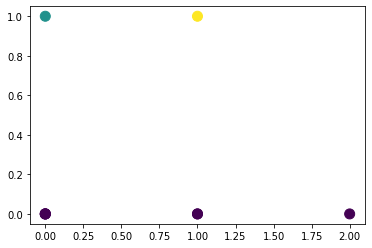

In [15]:
AggloXX2 = np.array(AggloX2)
plt.scatter(AggloXX2[:, 1], AggloXX2[:, 2], c=AggloXX2[:, 152], s=100, cmap='viridis')

# k_means

In [77]:
X_kmeans2 = df2.iloc[:,1:]
distortions2 = []
K = range(1,10)
for k in K:
    kmeanModel2 = KMeans(n_clusters=k)
    kmeanModel2.fit(X_kmeans2)
    distortions2.append(kmeanModel2.inertia_)

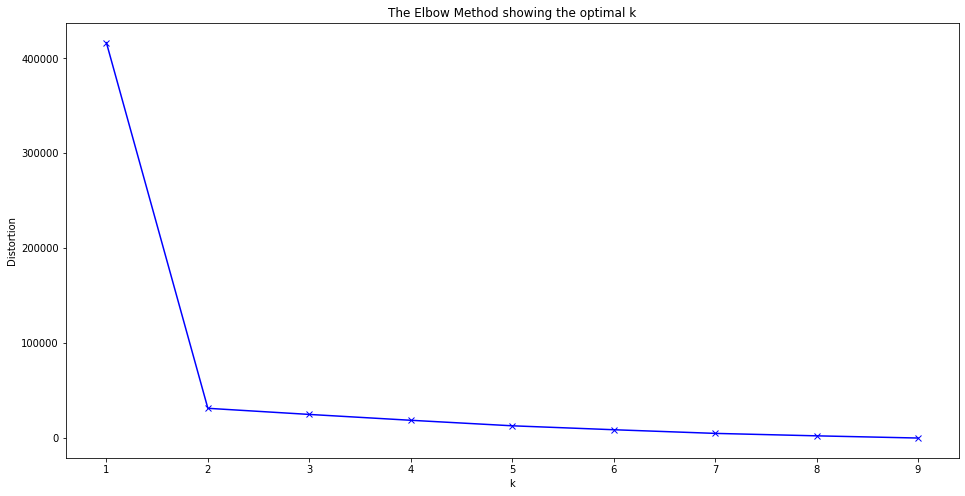

In [78]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions2, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [79]:
kmeanModel2 = KMeans(n_clusters=3)
kmeanModel2.fit(X_kmeans2)

KMeans(n_clusters=3)

In [80]:
y_kmeans2 = kmeanModel2.predict(X_kmeans2)
X_kmeans2['k_means'] = y_kmeans2
centers2 = kmeanModel2.cluster_centers_
X_kmeans2

,86,91,93,99,113,136,147,152,216,226,...,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722,k_means
0,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,3,0,2,2,2,...,1,1,0,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,2,2,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# X_kmeans22 = np.array(X_kmeans2)

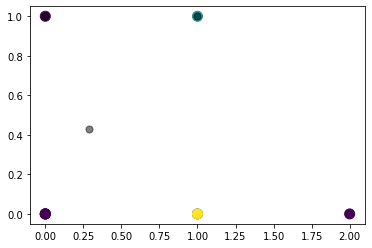

In [22]:
plt.scatter(X_kmeans22[:, 1], X_kmeans22[:, 2], c=y_kmeans2, s=100, cmap='viridis')
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=50, alpha=0.5);

# DBSCAN

In [31]:
X2 = df2.iloc[:,1:]
clustering = DBSCAN(eps=3, min_samples=4).fit(X2)
clustering

DBSCAN(eps=3, min_samples=4)

In [32]:
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1])

# q3.

In [58]:
X_kmeans1
# groupsOFCity

,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,brand_Acer::ایسر,...,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,k_means
0,4296.0,4879.0,4879.0,0.0,4296.0,0.0,4879.0,4296.0,0.0,4.0,...,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0,0
1,5408.0,8773.0,8773.0,0.0,5408.0,0.0,8773.0,5021.0,387.0,6.0,...,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0,0
2,6269.0,11057.0,11057.0,405.0,5864.0,405.0,11057.0,5443.0,421.0,39.0,...,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0,2
3,2582.0,2277.0,2277.0,0.0,2582.0,0.0,2277.0,2582.0,0.0,5.0,...,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0,0
4,10862.0,15088.0,15088.0,681.0,10181.0,681.0,15088.0,9560.0,621.0,88.0,...,3523.0,1004.0,596.0,1277.0,592.0,1064.0,1221.0,528.0,0.0,2
5,2925.0,1683.0,1683.0,0.0,2925.0,0.0,1683.0,2925.0,0.0,6.0,...,1133.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,0
6,6600.0,18344.0,18344.0,370.0,6230.0,370.0,18344.0,5771.0,459.0,32.0,...,3874.0,1080.0,456.0,1550.0,518.0,1149.0,1802.0,1174.0,0.0,2
7,3491.0,4421.0,4421.0,0.0,3491.0,0.0,4421.0,3491.0,0.0,0.0,...,1289.0,0.0,687.0,332.0,0.0,0.0,613.0,572.0,0.0,0
8,28008.0,53929.0,53929.0,2468.0,25540.0,2468.0,53929.0,23087.0,2453.0,224.0,...,10500.0,2288.0,1159.0,2770.0,1622.0,5417.0,4466.0,1376.0,1237.0,1


In [59]:
kmean_prediction1 = pd.concat([groupsOFCity,X_kmeans1],axis=1)
kmean_prediction1

,city,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,...,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,k_means
0,Ahvaz,4296.0,4879.0,4879.0,0.0,4296.0,0.0,4879.0,4296.0,0.0,...,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0,0
1,Isfahan,5408.0,8773.0,8773.0,0.0,5408.0,0.0,8773.0,5021.0,387.0,...,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0,0
2,Karaj,6269.0,11057.0,11057.0,405.0,5864.0,405.0,11057.0,5443.0,421.0,...,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0,2
3,Kermanshah,2582.0,2277.0,2277.0,0.0,2582.0,0.0,2277.0,2582.0,0.0,...,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0,0
4,Mashhad,10862.0,15088.0,15088.0,681.0,10181.0,681.0,15088.0,9560.0,621.0,...,3523.0,1004.0,596.0,1277.0,592.0,1064.0,1221.0,528.0,0.0,2
5,Qom,2925.0,1683.0,1683.0,0.0,2925.0,0.0,1683.0,2925.0,0.0,...,1133.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,0
6,Shiraz,6600.0,18344.0,18344.0,370.0,6230.0,370.0,18344.0,5771.0,459.0,...,3874.0,1080.0,456.0,1550.0,518.0,1149.0,1802.0,1174.0,0.0,2
7,Tabriz,3491.0,4421.0,4421.0,0.0,3491.0,0.0,4421.0,3491.0,0.0,...,1289.0,0.0,687.0,332.0,0.0,0.0,613.0,572.0,0.0,0
8,Tehran,28008.0,53929.0,53929.0,2468.0,25540.0,2468.0,53929.0,23087.0,2453.0,...,10500.0,2288.0,1159.0,2770.0,1622.0,5417.0,4466.0,1376.0,1237.0,1


In [60]:
X_kmeans1= np.array(X_kmeans1)

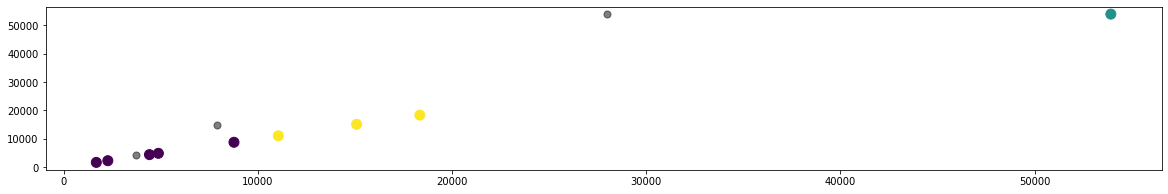

In [61]:
plt.scatter(X_kmeans1[:, 1], X_kmeans1[:, 2], c=y_kmeans1, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

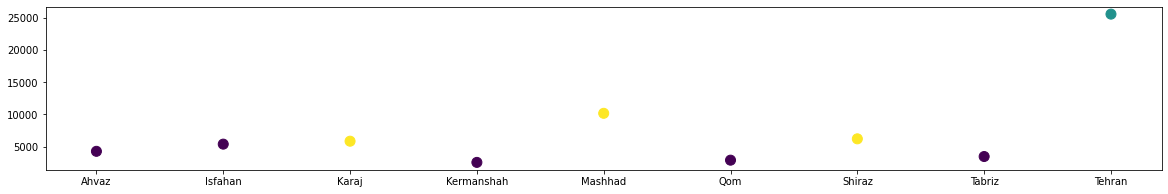

In [62]:
plt.scatter(kmean_prediction1['city'], X_kmeans1[:, 4], c=y_kmeans1, s=100, cmap='viridis')


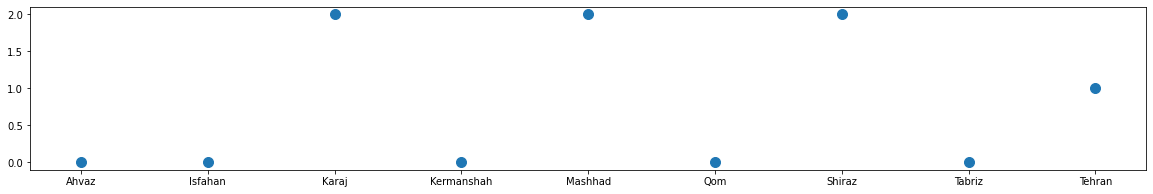

In [63]:
plt.scatter(kmean_prediction1['city'],y_kmeans1, s=100, cmap='viridis')


In [64]:
CitieWithinACluster0 = kmean_prediction1[kmean_prediction1['k_means'] == 0 ]
CitieWithinACluster0

,city,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,...,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,k_means
0,Ahvaz,4296.0,4879.0,4879.0,0.0,4296.0,0.0,4879.0,4296.0,0.0,...,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0,0
1,Isfahan,5408.0,8773.0,8773.0,0.0,5408.0,0.0,8773.0,5021.0,387.0,...,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0,0
3,Kermanshah,2582.0,2277.0,2277.0,0.0,2582.0,0.0,2277.0,2582.0,0.0,...,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0,0
5,Qom,2925.0,1683.0,1683.0,0.0,2925.0,0.0,1683.0,2925.0,0.0,...,1133.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,0
7,Tabriz,3491.0,4421.0,4421.0,0.0,3491.0,0.0,4421.0,3491.0,0.0,...,1289.0,0.0,687.0,332.0,0.0,0.0,613.0,572.0,0.0,0


In [65]:
CitieWithinACluster1 = kmean_prediction1[kmean_prediction1['k_means'] == 1 ]
CitieWithinACluster1

,city,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,...,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,k_means
8,Tehran,28008.0,53929.0,53929.0,2468.0,25540.0,2468.0,53929.0,23087.0,2453.0,...,10500.0,2288.0,1159.0,2770.0,1622.0,5417.0,4466.0,1376.0,1237.0,1


In [66]:
CitieWithinACluster2 = kmean_prediction1[kmean_prediction1['k_means'] == 2 ]
CitieWithinACluster2

,city,cat1_electronic-devices,cat1_vehicles,cat2_cars,cat2_computers,cat2_mobile-tablet,cat3_laptops,cat3_light,cat3_mobile-phones,cat3_tablet,...,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia,k_means
2,Karaj,6269.0,11057.0,11057.0,405.0,5864.0,405.0,11057.0,5443.0,421.0,...,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0,2
4,Mashhad,10862.0,15088.0,15088.0,681.0,10181.0,681.0,15088.0,9560.0,621.0,...,3523.0,1004.0,596.0,1277.0,592.0,1064.0,1221.0,528.0,0.0,2
6,Shiraz,6600.0,18344.0,18344.0,370.0,6230.0,370.0,18344.0,5771.0,459.0,...,3874.0,1080.0,456.0,1550.0,518.0,1149.0,1802.0,1174.0,0.0,2


In [81]:
X_kmeans2
groupsOfcity2
kmean_prediction2 = pd.concat([groupsOfcity2,X_kmeans2],axis=1)
kmean_prediction2

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722,k_means
0,اصفهان,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,اهواز,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,تبریز,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,تهران,1,1,1,0,1,3,0,2,2,...,1,1,0,1,1,1,1,1,1,1
4,شیراز,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,قم,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,مشهد,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,کرج,2,2,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,کرمانشاه,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X_kmeans2 = np.array(X_kmeans2)
X_kmeans2

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 2],
       [2, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

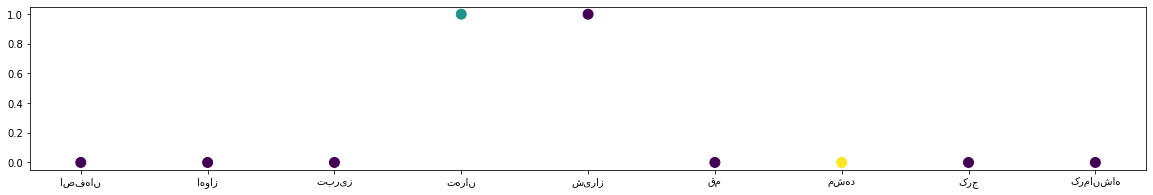

In [83]:
plt.scatter(kmean_prediction2['city_name_fa'], X_kmeans2[:, 4], c=y_kmeans2, s=100, cmap='viridis')
# plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=50, alpha=0.5)

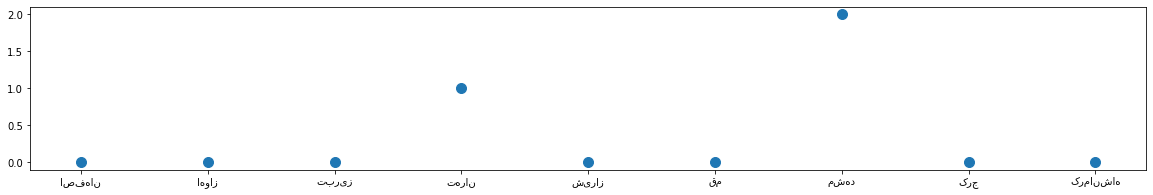

In [84]:
plt.scatter(kmean_prediction2['city_name_fa'],y_kmeans2, s=100, cmap='viridis')


In [85]:
CitiesDigikalaWithinACluster0 = kmean_prediction2[kmean_prediction2['k_means'] == 0 ]
CitiesDigikalaWithinACluster0

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722,k_means
0,اصفهان,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,اهواز,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,تبریز,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,شیراز,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,قم,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,کرج,2,2,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,کرمانشاه,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
CitiesDigikalaWithinACluster1 = kmean_prediction2[kmean_prediction2['k_means'] == 1 ]
CitiesDigikalaWithinACluster1

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722,k_means
3,تهران,1,1,1,0,1,3,0,2,2,...,1,1,0,1,1,1,1,1,1,1


In [87]:
CitiesDigikalaWithinACluster2 = kmean_prediction2[kmean_prediction2['k_means'] == 2 ]
CitiesDigikalaWithinACluster2

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722,k_means
6,مشهد,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [40]:
# CitiesDigikalaWithinACluster2 = kmean_prediction2[kmean_prediction2['k_means'] == 3 ]
# CitiesDigikalaWithinACluster2

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722,k_means
7,کرج,2,2,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [41]:
# CitiesDigikalaWithinACluster3 = kmean_prediction2[kmean_prediction2['k_means'] == 4 ]
# CitiesDigikalaWithinACluster3

,city_name_fa,86,91,93,99,113,136,147,152,216,...,2052576,2056354,2059919,2063420,2071547,2082626,2082782,2084160,2093722,k_means
0,اصفهان,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,4


# q4 . clustering items based on price

In [145]:
df_itemPrice = pd.read_csv ("/Users/mohadeseh/Documents/me/session8/data_mining/FDM_Project_dataset-99-2/divar_dataset/divar_posts_dataset.csv") 
df_itemPrice = df_itemPrice[['cat2','price']]
df_itemPrice

,cat2,price
0,furniture-and-home-decore,3850000
1,furniture-and-home-decore,30000
2,cars,-1
3,furniture-and-home-decore,600000
4,baby-and-toys,450000
...,...,...
947630,building-and-garden,180000
947631,audio-video,350000
947632,cars,17400000
947633,mobile-tablet,40000


In [146]:
df_itemPrice = df_itemPrice[(df_itemPrice['cat2'].notnull())]
df_itemPrice

,cat2,price
0,furniture-and-home-decore,3850000
1,furniture-and-home-decore,30000
2,cars,-1
3,furniture-and-home-decore,600000
4,baby-and-toys,450000
...,...,...
947630,building-and-garden,180000
947631,audio-video,350000
947632,cars,17400000
947633,mobile-tablet,40000


In [147]:
df_itemPrice = df_itemPrice[(df_itemPrice['price'] != -1)]
df_itemPrice

,cat2,price
0,furniture-and-home-decore,3850000
1,furniture-and-home-decore,30000
3,furniture-and-home-decore,600000
4,baby-and-toys,450000
5,furniture-and-home-decore,1000000
...,...,...
947630,building-and-garden,180000
947631,audio-video,350000
947632,cars,17400000
947633,mobile-tablet,40000


In [148]:
df_itemPrice['price'].min(),df_itemPrice['price'].max()

(1, 400000000)

In [149]:
# df_itemPrice.loc[df_itemPrice[(df_itemPrice['price']>50)]['price'].index,'price']=0

df_itemPrice.loc[df_itemPrice[(df_itemPrice['price']<=50)]['price'].index,'price']=0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [150]:
df_itemPrice.loc[df_itemPrice[((50 < df_itemPrice['price']) & (df_itemPrice['price'] <= 100))]['price'].index,'price']=1

df_itemPrice.loc[df_itemPrice[((100 < df_itemPrice['price']) & (df_itemPrice['price'] <= 200))]['price'].index,'price']=2

df_itemPrice.loc[df_itemPrice[((200 < df_itemPrice['price']) & (df_itemPrice['price'] <= 300))]['price'].index,'price']=3

df_itemPrice.loc[df_itemPrice[((300 < df_itemPrice['price']) & (df_itemPrice['price'] <= 400))]['price'].index,'price']=4

df_itemPrice.loc[df_itemPrice[((400 < df_itemPrice['price']) & (df_itemPrice['price'] <= 500))]['price'].index,'price']=5

df_itemPrice.loc[df_itemPrice[((500 < df_itemPrice['price']) & (df_itemPrice['price'] <= 600))]['price'].index,'price']=6


df_itemPrice.loc[df_itemPrice[((600 < df_itemPrice['price']) & (df_itemPrice['price'] <= 700))]['price'].index,'price']=7

df_itemPrice.loc[df_itemPrice[((700 < df_itemPrice['price']) & (df_itemPrice['price'] <= 800))]['price'].index,'price']=8

df_itemPrice.loc[df_itemPrice[((800 < df_itemPrice['price']) & (df_itemPrice['price'] <= 900))]['price'].index,'price']=9

df_itemPrice.loc[df_itemPrice[((900 < df_itemPrice['price']) & (df_itemPrice['price'] <= 1000))]['price'].index,'price']=10



In [151]:
df_itemPrice.loc[df_itemPrice[((1000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 3000))]['price'].index,'price']=11

df_itemPrice.loc[df_itemPrice[((3000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 5000))]['price'].index,'price']=12

df_itemPrice.loc[df_itemPrice[((5000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 7000))]['price'].index,'price']=13

df_itemPrice.loc[df_itemPrice[((7000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 10000))]['price'].index,'price']=14


df_itemPrice.loc[df_itemPrice[((10000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 50000))]['price'].index,'price']=15

df_itemPrice.loc[df_itemPrice[((50000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 100000))]['price'].index,'price']=16

df_itemPrice.loc[df_itemPrice[((100000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 500000))]['price'].index,'price']=17

df_itemPrice.loc[df_itemPrice[((500000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 1000000))]['price'].index,'price']=18

df_itemPrice.loc[df_itemPrice[((1000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 10000000))]['price'].index,'price']=19

df_itemPrice.loc[df_itemPrice[((10000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 20000000))]['price'].index,'price']=20

df_itemPrice.loc[df_itemPrice[((20000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 30000000))]['price'].index,'price']=21

df_itemPrice.loc[df_itemPrice[((30000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 40000000))]['price'].index,'price']=22

df_itemPrice.loc[df_itemPrice[((40000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 50000000))]['price'].index,'price']=23

df_itemPrice.loc[df_itemPrice[((50000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 60000000))]['price'].index,'price']=24

df_itemPrice.loc[df_itemPrice[((60000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 70000000))]['price'].index,'price']=25

df_itemPrice.loc[df_itemPrice[((70000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 80000000))]['price'].index,'price']=26

df_itemPrice.loc[df_itemPrice[((80000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 90000000))]['price'].index,'price']=27

df_itemPrice.loc[df_itemPrice[((90000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 100000000))]['price'].index,'price']=28

df_itemPrice.loc[df_itemPrice[((100000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 120000000))]['price'].index,'price']=29

df_itemPrice.loc[df_itemPrice[((120000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 140000000))]['price'].index,'price']=30

df_itemPrice.loc[df_itemPrice[((140000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 160000000))]['price'].index,'price']=31

df_itemPrice.loc[df_itemPrice[((160000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 180000000))]['price'].index,'price']=32

df_itemPrice.loc[df_itemPrice[((180000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 200000000))]['price'].index,'price']=33

df_itemPrice.loc[df_itemPrice[((200000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 220000000))]['price'].index,'price']=34

df_itemPrice.loc[df_itemPrice[((220000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 240000000))]['price'].index,'price']=35

df_itemPrice.loc[df_itemPrice[((240000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 260000000))]['price'].index,'price']=36

df_itemPrice.loc[df_itemPrice[((260000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 280000000))]['price'].index,'price']=37

df_itemPrice.loc[df_itemPrice[((280000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 300000000))]['price'].index,'price']=38

df_itemPrice.loc[df_itemPrice[((300000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 320000000))]['price'].index,'price']=39

df_itemPrice.loc[df_itemPrice[((320000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 340000000))]['price'].index,'price']=40

df_itemPrice.loc[df_itemPrice[((340000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 360000000))]['price'].index,'price']=41

df_itemPrice.loc[df_itemPrice[((360000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 380000000))]['price'].index,'price']=42

df_itemPrice.loc[df_itemPrice[((380000000 < df_itemPrice['price']) & (df_itemPrice['price'] <= 400000000))]['price'].index,'price']=43



In [152]:
df_itemPrice

,cat2,price
0,furniture-and-home-decore,19
1,furniture-and-home-decore,15
3,furniture-and-home-decore,18
4,baby-and-toys,17
5,furniture-and-home-decore,18
...,...,...
947630,building-and-garden,17
947631,audio-video,17
947632,cars,20
947633,mobile-tablet,15


In [153]:
d=df_itemPrice.iloc[:,1:]
d

,price
0,19
1,15
3,18
4,17
5,18
...,...
947630,17
947631,17
947632,20
947633,15


In [154]:
df_new = pd.get_dummies(d.astype(str))
df_new

,price_0,price_1,price_10,price_11,price_12,price_13,price_14,price_15,price_16,price_17,...,price_4,price_40,price_41,price_42,price_43,price_5,price_6,price_7,price_8,price_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
947631,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
947632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947633,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df_new = pd.concat([df_itemPrice.iloc[:,:-1],df_new],axis=1)
df_new

,cat2,price_0,price_1,price_10,price_11,price_12,price_13,price_14,price_15,price_16,...,price_4,price_40,price_41,price_42,price_43,price_5,price_6,price_7,price_8,price_9
0,furniture-and-home-decore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,furniture-and-home-decore,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,furniture-and-home-decore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,baby-and-toys,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,furniture-and-home-decore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,building-and-garden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947631,audio-video,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947632,cars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947633,mobile-tablet,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
group_item = df_new.groupby(by=['cat2'],as_index=False).sum()
group_item

,cat2,price_0,price_1,price_10,price_11,price_12,price_13,price_14,price_15,price_16,...,price_4,price_40,price_41,price_42,price_43,price_5,price_6,price_7,price_8,price_9
0,animals,38.0,35.0,7.0,195.0,187.0,141.0,836.0,11998.0,10067.0,...,8.0,0.0,0.0,0.0,0.0,7.0,7.0,2.0,12.0,3.0
1,audio-video,3.0,11.0,1.0,18.0,21.0,6.0,53.0,2075.0,4058.0,...,8.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,6.0,2.0
2,baby-and-toys,10.0,10.0,2.0,48.0,155.0,59.0,342.0,4653.0,3735.0,...,9.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,1.0
3,batch,33.0,6.0,11.0,473.0,656.0,479.0,740.0,2454.0,406.0,...,12.0,0.0,0.0,0.0,0.0,3.0,5.0,3.0,1.0,4.0
4,bicycle,1.0,5.0,1.0,1.0,11.0,3.0,22.0,665.0,1295.0,...,11.0,0.0,0.0,0.0,0.0,5.0,8.0,3.0,4.0,1.0
5,book-student-literature,3.0,4.0,1.0,63.0,141.0,60.0,283.0,992.0,234.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,building-and-garden,2.0,6.0,8.0,41.0,35.0,45.0,94.0,1453.0,2049.0,...,6.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,5.0
7,cars,16.0,13.0,0.0,3.0,12.0,33.0,63.0,482.0,26.0,...,3.0,20.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0
8,childrens-clothing-and-shoe,21.0,9.0,2.0,47.0,354.0,102.0,1038.0,7292.0,1314.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,clothing-and-shoes,179.0,133.0,2.0,146.0,662.0,266.0,2531.0,34417.0,18934.0,...,22.0,0.0,0.0,0.0,0.0,8.0,3.0,3.0,3.0,2.0


# agglomerative

In [157]:
X4 = group_item.iloc[:,1:]
X4 
clustering_agglomerative = AgglomerativeClustering(n_clusters=3).fit(X4)
clustering_agglomerative.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

# kmeans

In [158]:
X4 = group_item.iloc[:,1:]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel4 = KMeans(n_clusters=k)
    kmeanModel4.fit(X4)
    distortions.append(kmeanModel4.inertia_)

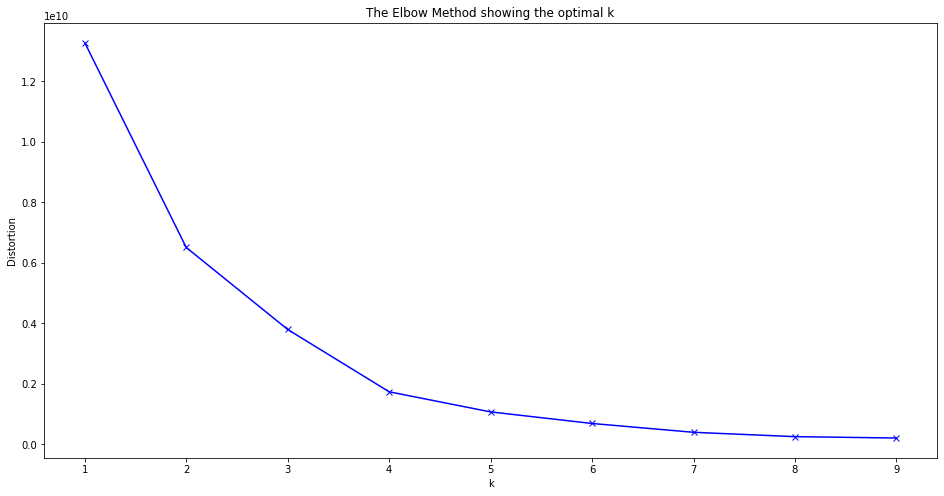

In [159]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [160]:
kmeanModel4 = KMeans(n_clusters=5)
kmeanModel4.fit(X4)

KMeans(n_clusters=5)

In [161]:
X4['k_means']= kmeanModel4.predict(X4)
X4

,price_0,price_1,price_10,price_11,price_12,price_13,price_14,price_15,price_16,price_17,...,price_40,price_41,price_42,price_43,price_5,price_6,price_7,price_8,price_9,k_means
0,38.0,35.0,7.0,195.0,187.0,141.0,836.0,11998.0,10067.0,14895.0,...,0.0,0.0,0.0,0.0,7.0,7.0,2.0,12.0,3.0,1
1,3.0,11.0,1.0,18.0,21.0,6.0,53.0,2075.0,4058.0,12361.0,...,0.0,0.0,0.0,0.0,8.0,3.0,0.0,6.0,2.0,0
2,10.0,10.0,2.0,48.0,155.0,59.0,342.0,4653.0,3735.0,8282.0,...,0.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,1.0,0
3,33.0,6.0,11.0,473.0,656.0,479.0,740.0,2454.0,406.0,260.0,...,0.0,0.0,0.0,0.0,3.0,5.0,3.0,1.0,4.0,0
4,1.0,5.0,1.0,1.0,11.0,3.0,22.0,665.0,1295.0,5666.0,...,0.0,0.0,0.0,0.0,5.0,8.0,3.0,4.0,1.0,0
5,3.0,4.0,1.0,63.0,141.0,60.0,283.0,992.0,234.0,127.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,2.0,6.0,8.0,41.0,35.0,45.0,94.0,1453.0,2049.0,9159.0,...,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,5.0,0
7,16.0,13.0,0.0,3.0,12.0,33.0,63.0,482.0,26.0,122.0,...,20.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,2
8,21.0,9.0,2.0,47.0,354.0,102.0,1038.0,7292.0,1314.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,179.0,133.0,2.0,146.0,662.0,266.0,2531.0,34417.0,18934.0,19303.0,...,0.0,0.0,0.0,0.0,8.0,3.0,3.0,3.0,2.0,4


In [39]:
kmean_prediction4 = pd.concat([group_item.iloc[:,0],X4],axis=1)
kmean_prediction4

,cat2,price_0,price_1,price_10,price_11,price_12,price_13,price_14,price_15,price_16,...,price_40,price_41,price_42,price_43,price_5,price_6,price_7,price_8,price_9,k_means
0,animals,38.0,35.0,7.0,195.0,187.0,141.0,836.0,11998.0,10067.0,...,0.0,0.0,0.0,0.0,7.0,7.0,2.0,12.0,3.0,3
1,audio-video,3.0,11.0,1.0,18.0,21.0,6.0,53.0,2075.0,4058.0,...,0.0,0.0,0.0,0.0,8.0,3.0,0.0,6.0,2.0,0
2,baby-and-toys,10.0,10.0,2.0,48.0,155.0,59.0,342.0,4653.0,3735.0,...,0.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,1.0,0
3,batch,33.0,6.0,11.0,473.0,656.0,479.0,740.0,2454.0,406.0,...,0.0,0.0,0.0,0.0,3.0,5.0,3.0,1.0,4.0,0
4,bicycle,1.0,5.0,1.0,1.0,11.0,3.0,22.0,665.0,1295.0,...,0.0,0.0,0.0,0.0,5.0,8.0,3.0,4.0,1.0,0
5,book-student-literature,3.0,4.0,1.0,63.0,141.0,60.0,283.0,992.0,234.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,building-and-garden,2.0,6.0,8.0,41.0,35.0,45.0,94.0,1453.0,2049.0,...,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,5.0,0
7,cars,16.0,13.0,0.0,3.0,12.0,33.0,63.0,482.0,26.0,...,20.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,2
8,childrens-clothing-and-shoe,21.0,9.0,2.0,47.0,354.0,102.0,1038.0,7292.0,1314.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,clothing-and-shoes,179.0,133.0,2.0,146.0,662.0,266.0,2531.0,34417.0,18934.0,...,0.0,0.0,0.0,0.0,8.0,3.0,3.0,3.0,2.0,4


[]

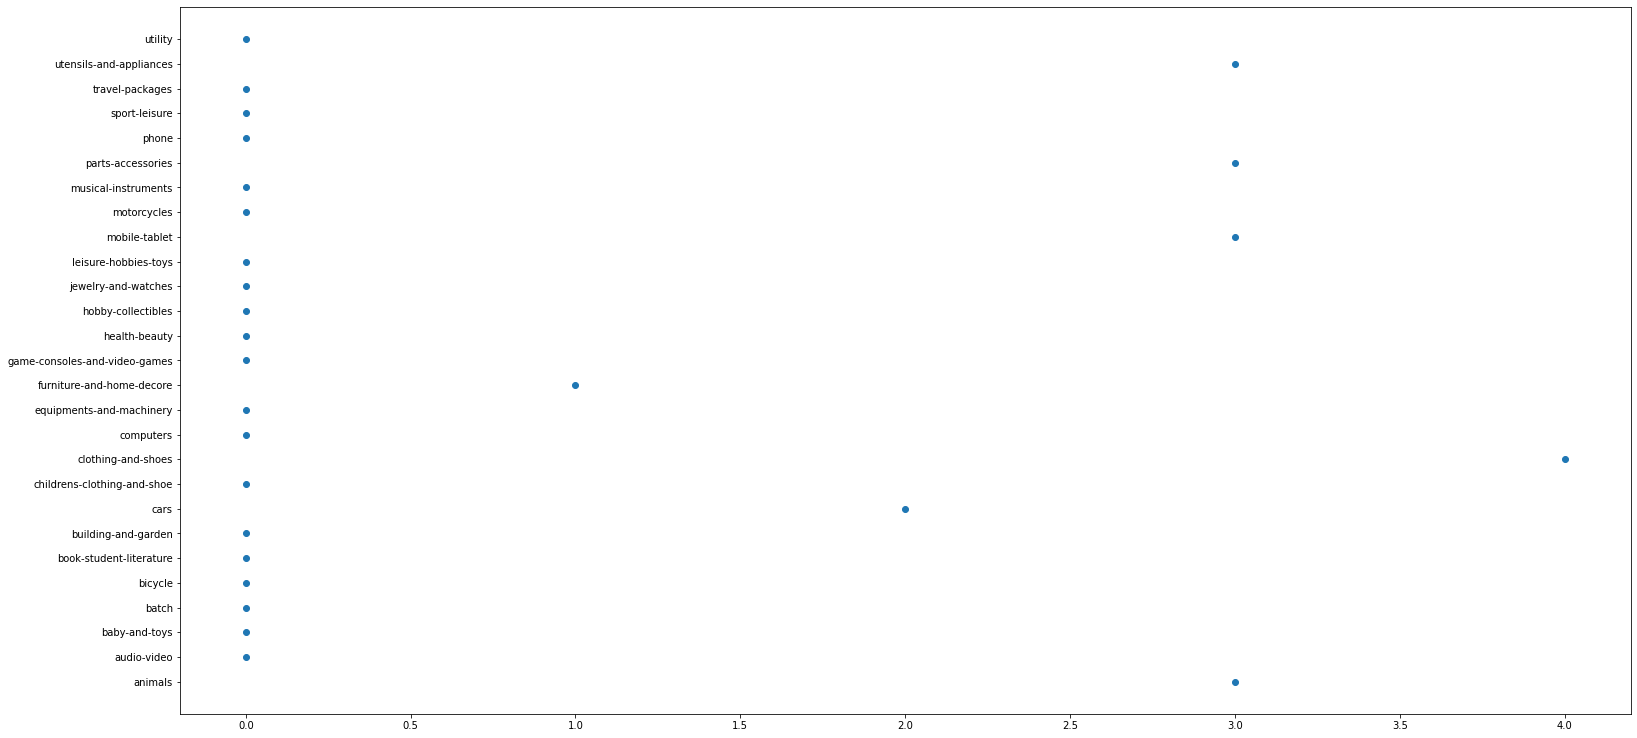

In [54]:
plt.scatter(kmean_prediction4['k_means'],kmean_prediction4['cat2'])
plt.rcParams["figure.figsize"] = (26,10)
plt.plot()

In [163]:
X4 = np.array(X4)


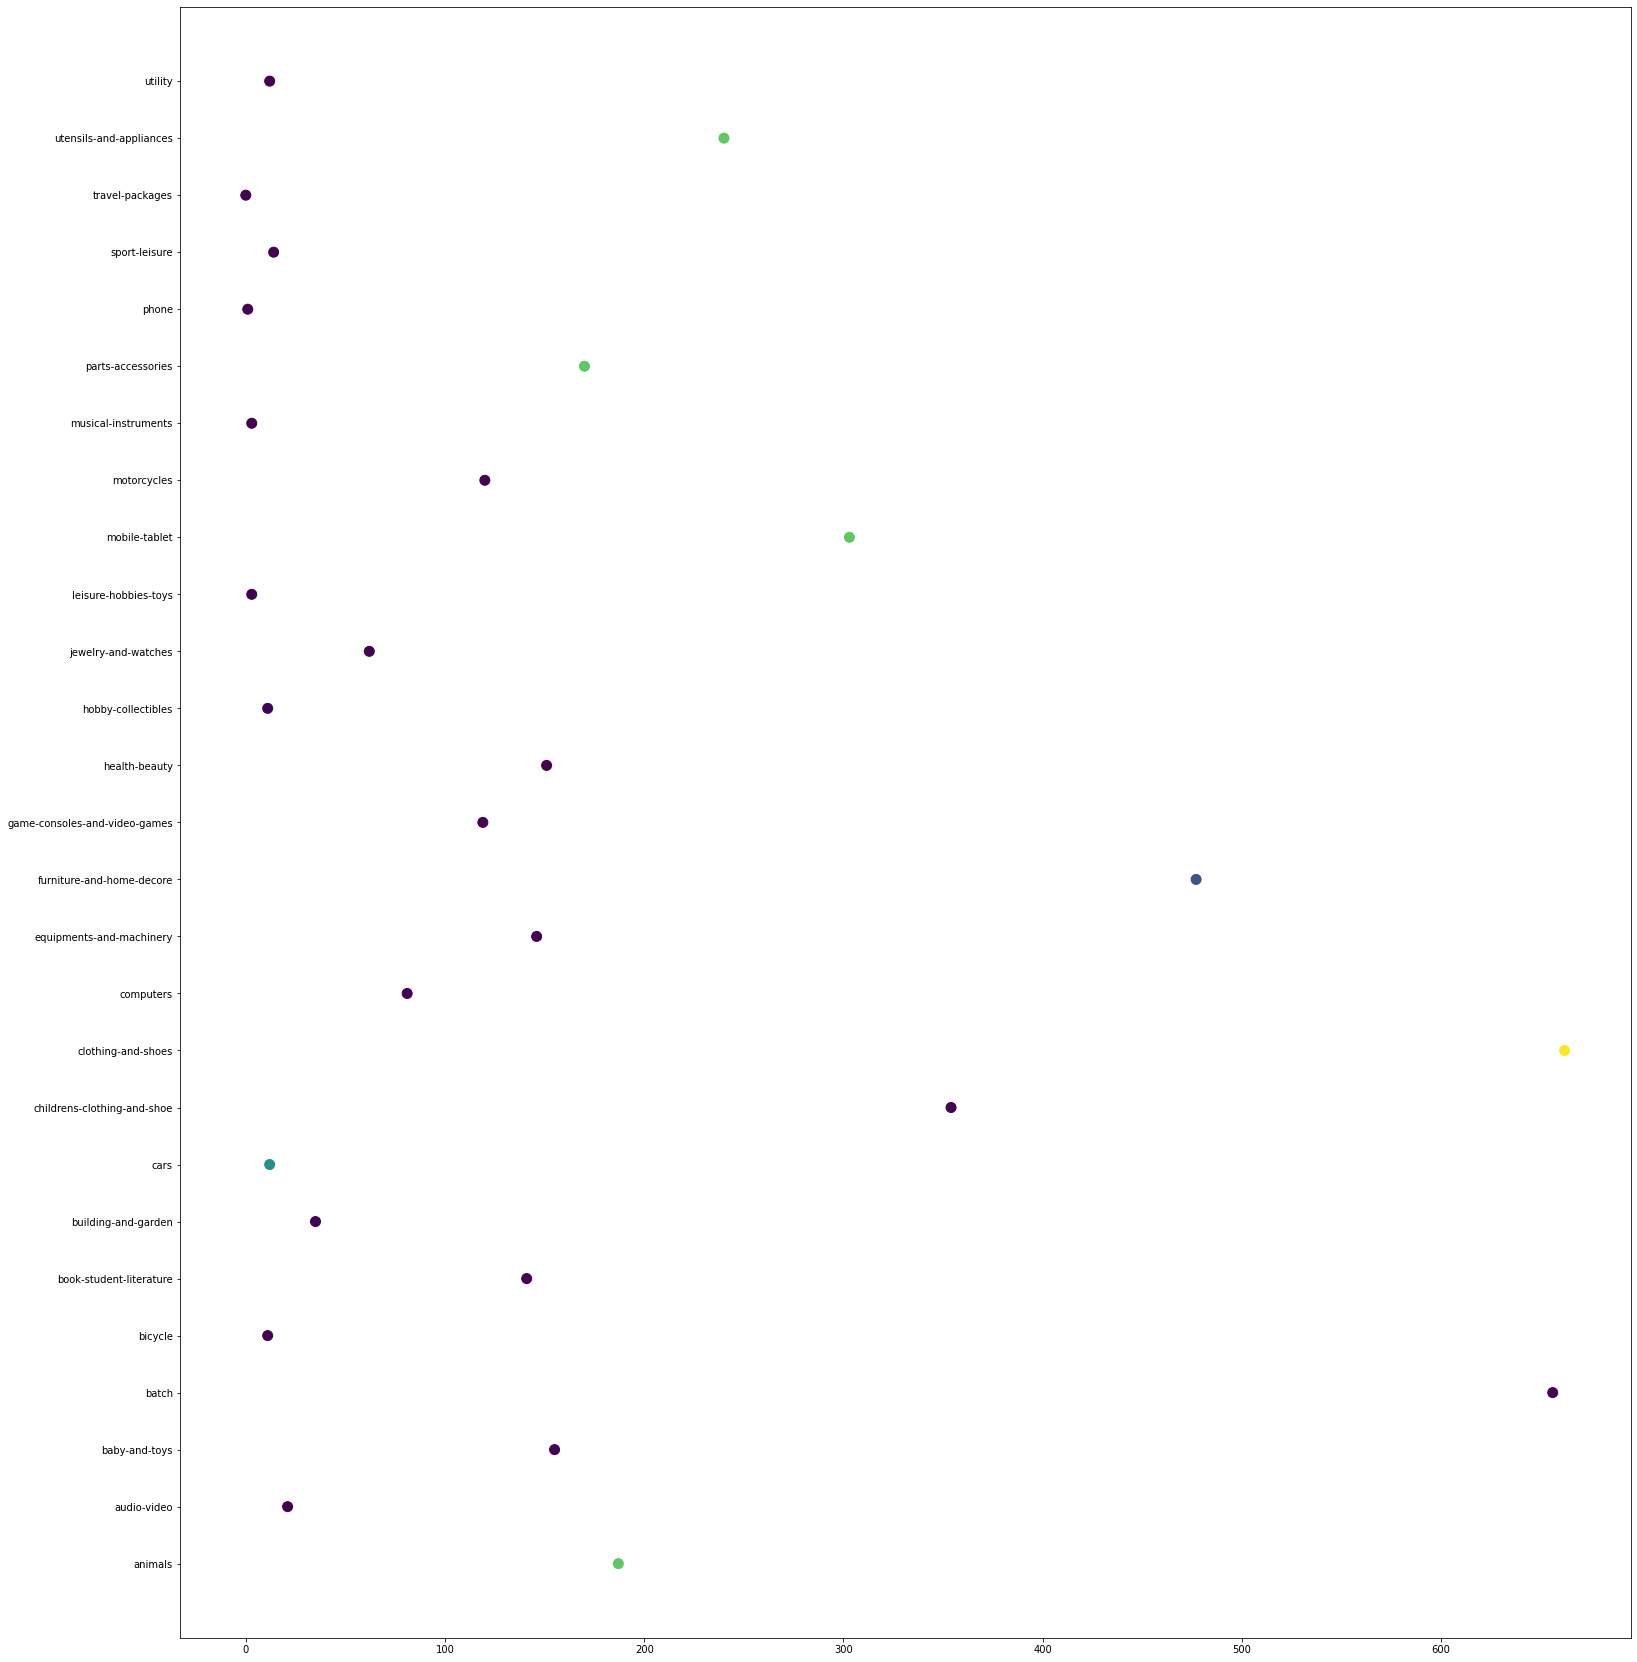

In [166]:
plt.scatter(X4[:,4],kmean_prediction4['cat2'] , c=kmean_prediction4['k_means'], s=100, cmap='viridis')
plt.rcParams["figure.figsize"] = (26,30)
# plt.figure(figsize=(16,8))

# DBSCAN

In [141]:
X4 = group_item.iloc[:,1:]
clustering = DBSCAN(eps=20, min_samples=2).fit(X4)

In [142]:
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])